# 05/17/23 - Getting numbers of bins for each S/N target

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"figure.figsize" : (8, 6)})
from astropy.io import fits
import pandas as pd

###################################################################################################################################

date_of_kin = '2023-02-28_2'

#------------------------------------------------------------------------------
# Directories and files

# data directory
data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
hst_dir = '/data/raw_data/HST_SLACS_ACS/kcwi_kinematics_lenses/'
table_dir = f'{data_dir}tables/'
mosaics_dir = f'{data_dir}mosaics/'
kinematics_full_dir = f'{data_dir}kinematics/'
kinematics_dir =f'{kinematics_full_dir}{date_of_kin}/'
print(f'Outputs will be in {kinematics_dir}')
print()

# target SN for voronoi binning
vorbin_SN_targets = np.array([10, 15, 20])

#################################################
# objects
obj_names = ['SDSSJ0029-0055',
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

Outputs will be in /data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/kinematics/2023-02-28_2/



In [2]:
# Load in the integrated velocities
int_vel = pd.read_csv('/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/kinematics/2023-02-28_2/integrated_velocities_allsn_targets.csv')

Text(0, 0.5, '# of Voronoi Bins')

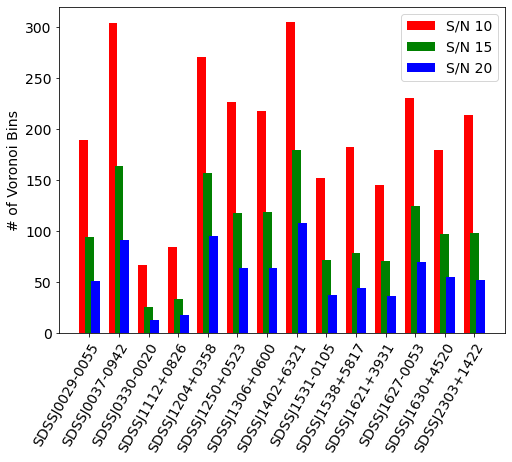

In [46]:
# load and record the number of bins for each

plt.rcParams.update({'font.size': 14})

colors=['r','g','b']

numbins = np.zeros((14,3), dtype=int)

fig, ax = plt.subplots(figsize=(8,6))

for i, obj_name in enumerate(obj_names):
    
    kin_dir = f'{kinematics_dir}{obj_name}/'
    
    for j, sn in enumerate(vorbin_SN_targets):
        sn_dir = f'{kin_dir}target_sn_{sn}/'
        
        vorbin_data = np.genfromtxt(f'{sn_dir}voronoi_2d_binning_{obj_name}_output.txt', delimiter='')
        
        numbins[i,j] = np.nanmax(vorbin_data[:,2])
        
        ax.bar(i-(1-j)*0.2, numbins[i,j], width=0.3, color=colors[j])
        
    
labels = ['S/N 10', 'S/N 15', 'S/N 20']
plt.legend(labels)
ax.set_xticks(range(14), labels=obj_names, rotation=60, ha='right', rotation_mode='anchor', fontsize=14)
ax.set_ylabel('# of Voronoi Bins')

plt.savefig(f'{kinematics_dir}numbins_histogram.pdf')

In [77]:
closeto_100 = np.argmin(abs(numbins - 100), axis=1)

In [78]:
closeto_100

array([1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1])

(array([2., 0., 2., 1., 3., 2., 1., 0., 2., 1.]),
 array([ 13. ,  22.5,  32. ,  41.5,  51. ,  60.5,  70. ,  79.5,  89. ,
         98.5, 108. ]),
 [<matplotlib.patches.Polygon at 0x7fc9e7975e48>])

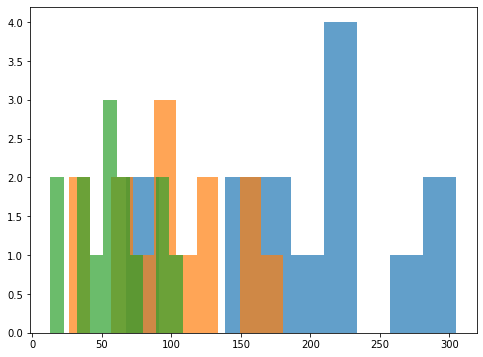

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(numbins[:,0], histtype='stepfilled', alpha=0.7)
ax.hist(numbins[:,1], histtype='stepfilled', alpha=0.7)
ax.hist(numbins[:,2], histtype='stepfilled', alpha=0.7)

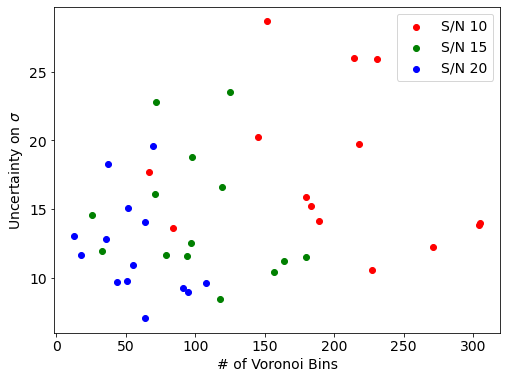

In [64]:
# plot the uncertainty as a function of number of bins

plt.figure(figsize=(8,6))

dVD = int_vel[['dVD_10','dVD_15','dVD_20']].to_numpy()

for j in range(3):
    plt.scatter(numbins[:,j], dVD[:,j], c=colors[j])
    
plt.xlabel('# of Voronoi Bins')
plt.ylabel(r'Uncertainty on $\sigma$')
plt.legend(labels)

In [65]:
numbins

array([[189,  94,  51],
       [304, 164,  91],
       [ 67,  26,  13],
       [ 84,  33,  18],
       [271, 157,  95],
       [227, 118,  64],
       [218, 119,  64],
       [305, 180, 108],
       [152,  72,  37],
       [183,  79,  44],
       [145,  71,  36],
       [231, 125,  70],
       [180,  97,  55],
       [214,  98,  52]])